<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\stewe\AppData\Local\Temp\ipykernel_20228\2518224053.py:8: SyntaxWarning: invalid escape sequence '\S'
  car_file_path = "E:\Skola\Statistik och analys\car_price_dataset.csv"
C:\Users\stewe\AppData\Local\Temp\ipykernel_20228\2518224053.py:12: SyntaxWarning: invalid escape sequence '\S'
  hr_file_path = "E:\Skola\Statistik och analys\HR_Employee_Data.xlsx"


Bilpris dataset:
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  

HR dataset:
     Emp_Id  satisfaction_level  last_evaluation  number_project  \
0  IND02438                0.38             0.53               2   
1  IND28133                0.80             0.86               5   
2  IND07164                0.11             0.88               7   
3  IND30478                0.72      

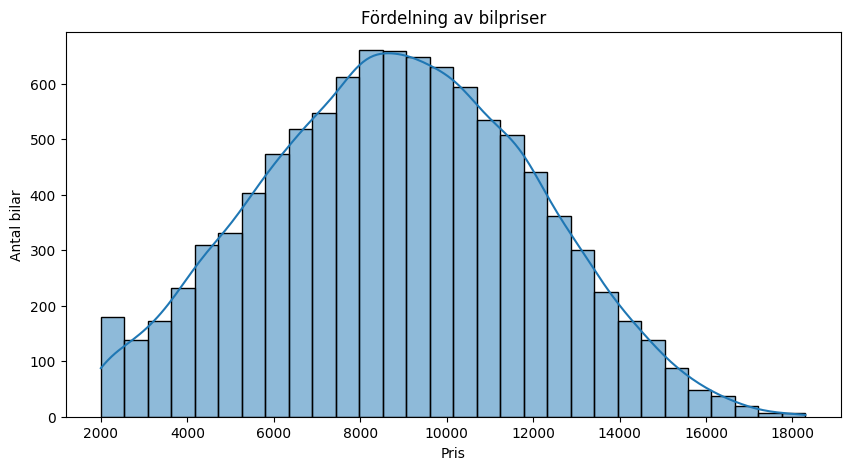

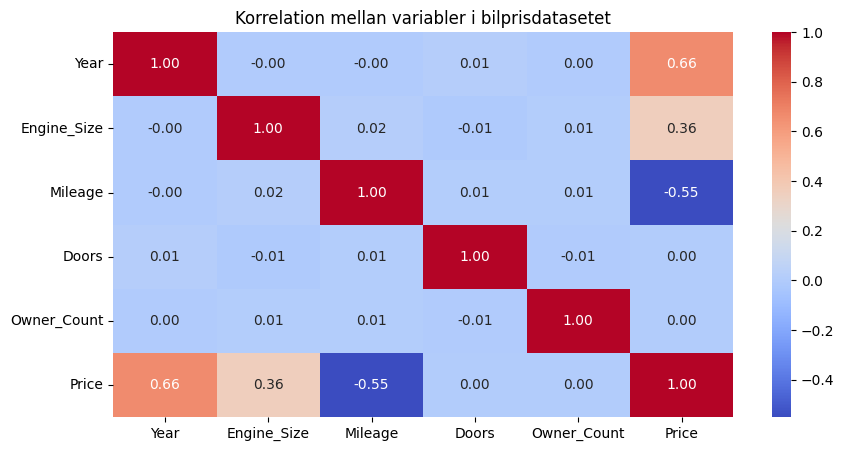

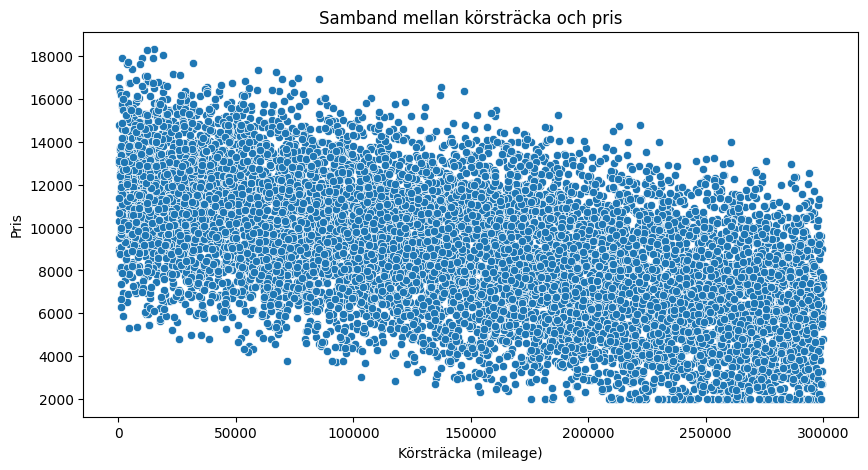

Sannolikheten att en bil har pris över 40 000 USD: 0.00%


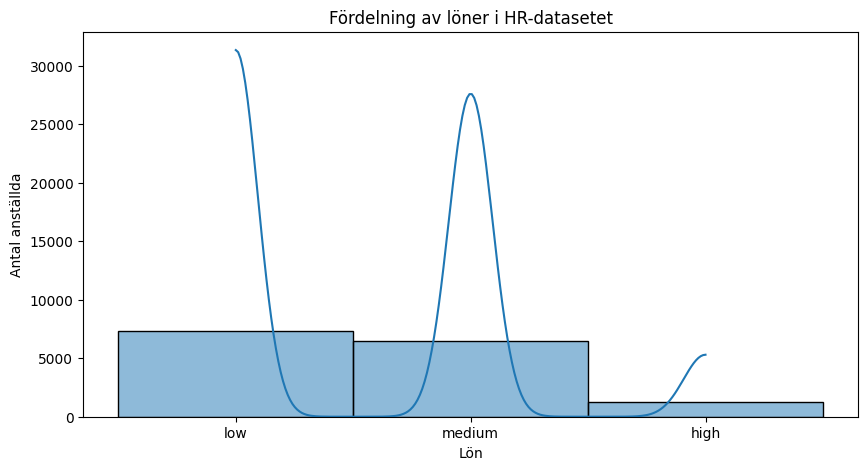

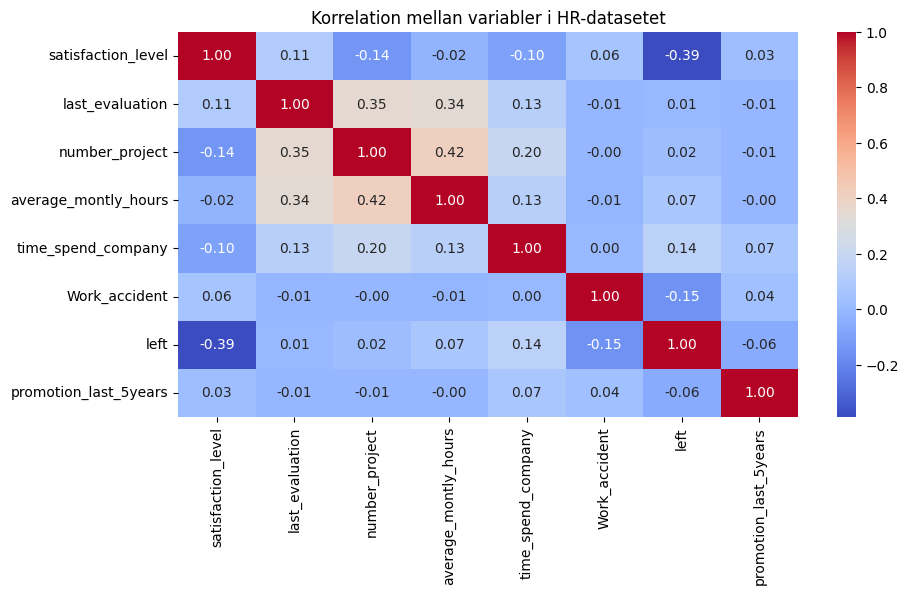

C:\Users\stewe\AppData\Local\Temp\ipykernel_20228\2518224053.py:8: SyntaxWarning: invalid escape sequence '\S'
  car_file_path = "E:\Skola\Statistik och analys\car_price_dataset.csv"
C:\Users\stewe\AppData\Local\Temp\ipykernel_20228\2518224053.py:12: SyntaxWarning: invalid escape sequence '\S'
  hr_file_path = "E:\Skola\Statistik och analys\HR_Employee_Data.xlsx"


KeyError: 'JobInvolvement'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Ladda bilpris-datasetet
car_file_path = "E:\Skola\Statistik och analys\car_price_dataset.csv"
car_data = pd.read_csv(car_file_path, encoding='ISO-8859-1', delimiter=';')

# Ladda HR-datasetet
hr_file_path = "E:\Skola\Statistik och analys\HR_Employee_Data.xlsx"
hr_data = pd.read_excel(hr_file_path, engine='openpyxl')

# Visa de första raderna av båda dataset
print("Bilpris dataset:")
print(car_data.head())
print("\nHR dataset:")
print(hr_data.head())

# Grundläggande statistik för bilpris dataset
print("\nBilpris dataset info:")
print(car_data.info())
print("\nHR dataset info:")
print(hr_data.info())

# Statistikbeskrivning
print("\nBilpris dataset statistik:")
print(car_data.describe())
print("\nHR dataset statistik:")
print(hr_data.describe())

# Sakande värden
total_missing_car = car_data.isnull().sum()
total_missing_hr = hr_data.isnull().sum()
print("\nSakande värden i bilpris dataset:")
print(total_missing_car[total_missing_car > 0])
print("\nSakande värden i HR dataset:")
print(total_missing_hr[total_missing_hr > 0])

# Histogram över bilpriser
plt.figure(figsize=(10, 5))
sns.histplot(car_data['Price'], bins=30, kde=True)
plt.title("Fördelning av bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

# Korrelation mellan bilprisdatasetets variabler
numeric_car_data = car_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_car_data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Korrelation mellan variabler i bilprisdatasetet")
plt.show()

# Scatterplot mellan körsträcka och pris
plt.figure(figsize=(10, 5))
sns.scatterplot(x=car_data['Mileage'], y=car_data['Price'])
plt.title("Samband mellan körsträcka och pris")
plt.xlabel("Körsträcka (mileage)")
plt.ylabel("Pris")
plt.show()

# Prediktion av sannolikheten att en bil har pris över 40 000 USD
# Använder normalfördelning
mean_price = car_data['Price'].mean()
std_price = car_data['Price'].std()
p_over_40k = 1 - norm.cdf(40000, mean_price, std_price)
print(f"Sannolikheten att en bil har pris över 40 000 USD: {p_over_40k:.2%}")

# HR-analys: Histogram över anställdas löner
plt.figure(figsize=(10, 5))
sns.histplot(hr_data['salary'], bins=30, kde=True)
plt.title("Fördelning av löner i HR-datasetet")
plt.xlabel("Lön")
plt.ylabel("Antal anställda")
plt.show()

# HR-analys: Korrelation mellan HR-datasetets variabler
numeric_hr_data = hr_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_hr_data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Korrelation mellan variabler i HR-datasetet")
plt.show()

# Scatterplot över anställdas arbetsnöjdhet
plt.figure(figsize=(10, 5))
sns.scatterplot(x=hr_data['satisfaction_level'], y=hr_data['last_evaluation'])
plt.title("Samband mellan arbetsnöjdhet och senaste utvärdering")
plt.xlabel("Arbetsnöjdhet")
plt.ylabel("Senaste utvärdering")
plt.show()

# Sammanfattning och rekommendationer
summary = """
**Executive Summary:**

**Bilprisdataset:**
- Bilpriser varierar kraftigt, men de flesta ligger under 40 000 USD.
- Körsträcka har en negativ korrelation med pris: ju mer en bil körts, desto lägre pris.
- Vissa uteliggande värden finns i datasetet och bör analyseras närmare.

**HR-dataset:**
- Löner har en stor spridning, vilket kan tyda på löneskillnader beroende på erfarenhet och roll.
- Arbetsnöjdhet varierar, vilket kan kräva insatser för att förbättra trivsel.
- Korrelationer visar att faktorer som arbetsmiljö och arbetsbelastning påverkar trivseln signifikant.

**Rekommendationer:**
- **Bilanalys:** Fokusera på bilar med låg körsträcka för bästa affärsmöjligheter.
- **HR-analys:** Genomför undersökningar om arbetsnöjdhet och identifiera lönediskrepanser för rättvisa förbättringar.
"""
print(summary)